In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd

import scipy.stats as st
import numpy as np
from citipy import citipy
import time
import json
from pprint import pprint

In [2]:
# Request API response and store in variable called "response"
url_ju_av = "https://www.ncdc.noaa.gov/cag/statewide/time-series/13-tavg-1-6-1980-2020.json?base_prd=true&begbaseyear=1901&endbaseyear=2000"

url_jul_av = "https://www.ncdc.noaa.gov/cag/statewide/time-series/13-tavg-1-7-1980-2020.json?base_prd=true&begbaseyear=1901&endbaseyear=2000"
url_aug_av = "https://www.ncdc.noaa.gov/cag/statewide/time-series/13-tavg-1-8-1980-2020.json?base_prd=true&begbaseyear=1901&endbaseyear=2000"
url_jun_max  ="https://www.ncdc.noaa.gov/cag/statewide/time-series/13-tmax-1-6-1980-2020.json?base_prd=true&begbaseyear=1901&endbaseyear=2000"
url_jul_max = "https://www.ncdc.noaa.gov/cag/statewide/time-series/13-tmax-1-7-1980-2020.json?base_prd=true&begbaseyear=1901&endbaseyear=2000"
url_aug_max = "https://www.ncdc.noaa.gov/cag/statewide/time-series/13-tmax-1-8-1980-2020.json?base_prd=true&begbaseyear=1901&endbaseyear=2000"
url_jun_DR =  "https://www.ncdc.noaa.gov/cag/statewide/time-series/13-pdsi-1-6-1980-2020.json?base_prd=true&begbaseyear=1901&endbaseyear=2000"
url_jul_DR =  "https://www.ncdc.noaa.gov/cag/statewide/time-series/13-pdsi-1-7-1980-2020.json?base_prd=true&begbaseyear=1901&endbaseyear=2000"
url_aug_DR = "https://www.ncdc.noaa.gov/cag/statewide/time-series/13-pdsi-1-8-1980-2020.json?base_prd=true&begbaseyear=1901&endbaseyear=2000"

jun_ar_re = requests.get(url_ju_av)
jul_ar_re = requests.get(url_jul_av)
aug_ar_re = requests.get(url_aug_av)
jun_max_re = requests.get(url_jun_max)
jul_max_re = requests.get(url_jul_max)
aug_max_re = requests.get(url_aug_max)
jun_DR_re = requests.get(url_jun_DR)
jul_DR_re = requests.get(url_jul_DR)
aug_DR_re = requests.get(url_aug_DR )
# create new variable that contains the json output from the request
response_junA = jun_ar_re.json()
response_julA = jul_ar_re.json()
response_augA = aug_ar_re.json()
response_junM = jun_max_re.json()
response_julM = jul_max_re.json()
response_augM = aug_max_re.json()
response_junDR =jun_DR_re.json()
response_julDR = jul_DR_re.json()
response_augDR = aug_DR_re.json()
print(type(response_junA))


<class 'dict'>


## creating dataframe for average temp in IOWA ( July -Aug)


In [3]:
datajunA = response_junA ["data"]
JA_df = pd.DataFrame.from_dict(datajunA , orient="index")
JA_df = JA_df .rename(columns={"value": "Jun mean Temp"})
JA_df.reset_index(drop=True, inplace=True)

dataJulA = response_julA ["data"]
JulA_df = pd.DataFrame.from_dict(dataJulA , orient="index")
JulA_df = JulA_df .rename(columns={"value": "Jul mean Temp"})
JulA_df.reset_index(drop=True, inplace=True)

dataAugA = response_augA["data"]
AugA_df = pd.DataFrame.from_dict(dataAugA , orient="index")
AugA_df = AugA_df .rename(columns={"value": "Aug mean Temp"})
AugA_df.reset_index(drop=True, inplace=True)


Jun_Jul_ave = pd.merge(JA_df, JulA_df, left_index=True, right_index=True)
Jun_Jul_ave

Jun_Jul_Aug_ave = pd.merge(Jun_Jul_ave, AugA_df,  left_index=True, right_index=True)
Jun_Jul_Aug_ave

Iowa_meanTemp = Jun_Jul_Aug_ave.drop(columns=['anomaly_x', 'anomaly_y', 'anomaly'])
Iowa_meanTemp.head()

,Jun mean Temp,Jul mean Temp,Aug mean Temp
0,69.6,76.7,73.3
1,70.2,73.3,69.6
2,64.5,74.1,70.0
3,69.6,77.2,78.1
4,70.5,72.2,73.4


## creating dataframe for max temp in Iowa (Jun-Aug)

In [4]:
datajulM = response_junM ["data"]
JM_df = pd.DataFrame.from_dict(datajulM , orient="index")
JM_df = JM_df .rename(columns={"value": "Jun Max Temp"})
JM_df.reset_index(drop=True, inplace=True)

dataJulM = response_julM ["data"]
JulM_df = pd.DataFrame.from_dict(dataJulM , orient="index")
JulM_df = JulM_df .rename(columns={"value": "Jul MaxTemp"})
JulM_df.reset_index(drop=True, inplace=True)

dataAugM = response_augM ["data"]
AugM_df = pd.DataFrame.from_dict(dataAugM , orient="index")
AugM_df = AugM_df .rename(columns={"value": "Aug MaxTemp"})
AugM_df.reset_index(drop=True, inplace=True)

Jun_Jul_max = pd.merge(JM_df, JulM_df, left_index=True, right_index=True)


Jun_Jul_Aug_max = pd.merge(Jun_Jul_max, AugM_df,  left_index=True, right_index=True)

Iowa_maxTemp = Jun_Jul_Aug_max.drop(columns=['anomaly_x', 'anomaly_y', 'anomaly'])
Iowa_maxTemp.head()

,Jun Max Temp,Jul MaxTemp,Aug MaxTemp
0,81.5,88.8,84.3
1,82.0,83.0,80.1
2,75.7,84.8,80.1
3,80.5,88.8,90.4
4,81.3,83.9,86.0


In [5]:
Iowa_mean_max = pd.merge(Iowa_meanTemp, Iowa_maxTemp,  left_index=True, right_index=True)
Iowa_mean_max.head()

,Jun mean Temp,Jul mean Temp,Aug mean Temp,Jun Max Temp,Jul MaxTemp,Aug MaxTemp
0,69.6,76.7,73.3,81.5,88.8,84.3
1,70.2,73.3,69.6,82.0,83.0,80.1
2,64.5,74.1,70.0,75.7,84.8,80.1
3,69.6,77.2,78.1,80.5,88.8,90.4
4,70.5,72.2,73.4,81.3,83.9,86.0


## creating dataframe for drought in Iowa (Jun-Aug)

In [6]:
datajunDR = response_junDR  ["data"]
JD_df = pd.DataFrame.from_dict(datajunDR , orient="index")
JD_df = JD_df .rename(columns={"value": "Jun Drought Severity"})
JD_df.reset_index(drop=True, inplace=True)

dataJulD = response_julDR  ["data"]
JulD_df = pd.DataFrame.from_dict(dataJulD , orient="index")
JulD_df = JulD_df .rename(columns={"value": "Jul Drought Severity"})
JulD_df.reset_index(drop=True, inplace=True)


dataAugDR = response_augDR ["data"]
AugD_df = pd.DataFrame.from_dict(dataAugDR, orient="index")
AugD_df = AugD_df .rename(columns={"value": "Aug Drought Severity"})
AugD_df.reset_index(drop=True, inplace=True)

Jun_Jul_DR = pd.merge(JD_df, JulD_df, left_index=True, right_index=True)


Jun_Jul_Aug_DR = pd.merge(Jun_Jul_DR, AugD_df,  left_index=True, right_index=True)

Iowa_DR = Jun_Jul_Aug_DR .drop(columns=['anomaly_x', 'anomaly_y', 'anomaly'])
Iowa_DR.head()

,Jun Drought Severity,Jul Drought Severity,Aug Drought Severity
0,-1.15,-1.63,1.36
1,0.30,0.88,1.58
2,2.44,3.29,3.49
3,4.60,3.61,2.30
4,4.14,4.00,2.49


In [7]:
Iowa_weather = pd.merge(Iowa_mean_max, Iowa_DR,  left_index=True, right_index=True)
Iowa_weather.head()

,Jun mean Temp,Jul mean Temp,Aug mean Temp,Jun Max Temp,Jul MaxTemp,Aug MaxTemp,Jun Drought Severity,Jul Drought Severity,Aug Drought Severity
0,69.6,76.7,73.3,81.5,88.8,84.3,-1.15,-1.63,1.36
1,70.2,73.3,69.6,82.0,83.0,80.1,0.30,0.88,1.58
2,64.5,74.1,70.0,75.7,84.8,80.1,2.44,3.29,3.49
3,69.6,77.2,78.1,80.5,88.8,90.4,4.60,3.61,2.30
4,70.5,72.2,73.4,81.3,83.9,86.0,4.14,4.00,2.49


In [8]:
Date = [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

Iowa_weather.insert(0, 'Year', Date)
Iowa_weather
#Iowa_weather_year = Iowa_weather .drop(columns=['date'])
Iowa_weather_year = Iowa_weather

Iowa_weather_year.to_csv("output_data/Iowa_weather.csv", index = False)
Iowa_weather_year.head()

,Year,Jun mean Temp,Jul mean Temp,Aug mean Temp,Jun Max Temp,Jul MaxTemp,Aug MaxTemp,Jun Drought Severity,Jul Drought Severity,Aug Drought Severity
0,1980,69.6,76.7,73.3,81.5,88.8,84.3,-1.15,-1.63,1.36
1,1981,70.2,73.3,69.6,82.0,83.0,80.1,0.30,0.88,1.58
2,1982,64.5,74.1,70.0,75.7,84.8,80.1,2.44,3.29,3.49
3,1983,69.6,77.2,78.1,80.5,88.8,90.4,4.60,3.61,2.30
4,1984,70.5,72.2,73.4,81.3,83.9,86.0,4.14,4.00,2.49


In [9]:
Iowa_path = "output_data/IOWA_corn_soyben_yield_Aug.csv"
Iowa_corn_soy_yield = pd.read_csv(Iowa_path)
Iowa_corn_soy_yield.head()

,Year,August Corn yield,August soybean yield
0,1980,7.2684,2.4228
1,1981,8.4125,2.6920
2,1982,8.2106,2.5574
3,1983,7.6722,2.5574
4,1984,8.2106,2.5574


In [10]:
Iowa_weather_yield = pd.merge(Iowa_weather_year, Iowa_corn_soy_yield, on="Year")
Iowa_weather_yield.tail(10)
Iowa_weather_yield.dtypes

Year                       int64
Jun mean Temp             object
Jul mean Temp             object
Aug mean Temp             object
Jun Max Temp              object
Jul MaxTemp               object
Aug MaxTemp               object
Jun Drought Severity      object
Jul Drought Severity      object
Aug Drought Severity      object
August Corn yield        float64
August soybean yield     float64
dtype: object

In [11]:
Iowa_weather_yield['Jun mean Temp'] = Iowa_weather_yield['Jun mean Temp'].astype(str).astype(float)
Iowa_weather_yield['Jul mean Temp'] = Iowa_weather_yield['Jul mean Temp'].astype(str).astype(float)
Iowa_weather_yield['Aug mean Temp'] = Iowa_weather_yield['Aug mean Temp'].astype(str).astype(float)
Iowa_weather_yield['Jun Max Temp'] = Iowa_weather_yield['Jun Max Temp'].astype(str).astype(float)
Iowa_weather_yield['Jul MaxTemp'] = Iowa_weather_yield['Jul MaxTemp'].astype(str).astype(float)
Iowa_weather_yield['Aug MaxTemp'] = Iowa_weather_yield['Aug MaxTemp'].astype(str).astype(float)
Iowa_weather_yield['Jun Drought Severity'] = Iowa_weather_yield['Jun Drought Severity'].astype(str).astype(float)
Iowa_weather_yield['Jul Drought Severity'] = Iowa_weather_yield['Jul Drought Severity'].astype(str).astype(float)
Iowa_weather_yield['Aug Drought Severity'] = Iowa_weather_yield['Aug Drought Severity'].astype(str).astype(float)






In [12]:
Iowa_weather_yield.dtypes

Year                       int64
Jun mean Temp            float64
Jul mean Temp            float64
Aug mean Temp            float64
Jun Max Temp             float64
Jul MaxTemp              float64
Aug MaxTemp              float64
Jun Drought Severity     float64
Jul Drought Severity     float64
Aug Drought Severity     float64
August Corn yield        float64
August soybean yield     float64
dtype: object

In [13]:
Iowa_weather_yield.head()

,Year,Jun mean Temp,Jul mean Temp,Aug mean Temp,Jun Max Temp,Jul MaxTemp,Aug MaxTemp,Jun Drought Severity,Jul Drought Severity,Aug Drought Severity,August Corn yield,August soybean yield
0,1980,69.6,76.7,73.3,81.5,88.8,84.3,-1.15,-1.63,1.36,7.2684,2.4228
1,1981,70.2,73.3,69.6,82.0,83.0,80.1,0.30,0.88,1.58,8.4125,2.6920
2,1982,64.5,74.1,70.0,75.7,84.8,80.1,2.44,3.29,3.49,8.2106,2.5574
3,1983,69.6,77.2,78.1,80.5,88.8,90.4,4.60,3.61,2.30,7.6722,2.5574
4,1984,70.5,72.2,73.4,81.3,83.9,86.0,4.14,4.00,2.49,8.2106,2.5574


In [14]:
Iowa_weather_year.to_csv("output_data/Iowa_weather_year.csv", index = False)


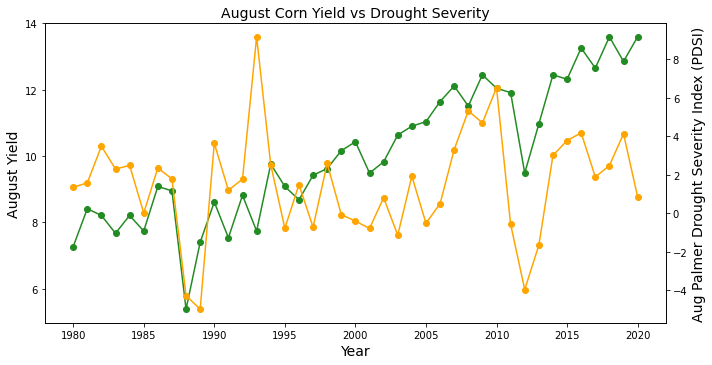

In [15]:

x_axis = Iowa_weather_yield['Year']
y_axis=  Iowa_weather_yield['August Corn yield']
y2_axis= Iowa_weather_yield['Aug Drought Severity']


fig,ax=plt.subplots(figsize=(10,5))
ax.plot(x_axis, y_axis, color="forestgreen", marker="o")

ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("August Yield",fontsize=14)


ax2=ax.twinx()
#ax2=corn_y.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x_axis, y2_axis,color="orange",marker="o")
ax2.set_ylabel("Aug Palmer Drought Severity Index (PDSI)",fontsize=14)
#severity.set_ylabel("Aug Palmer Drought Severity Index (PDSI)",fontsize=14)
plt.tight_layout()
plt.title("August Corn Yield vs Drought Severity", fontsize=14)



plt.show()





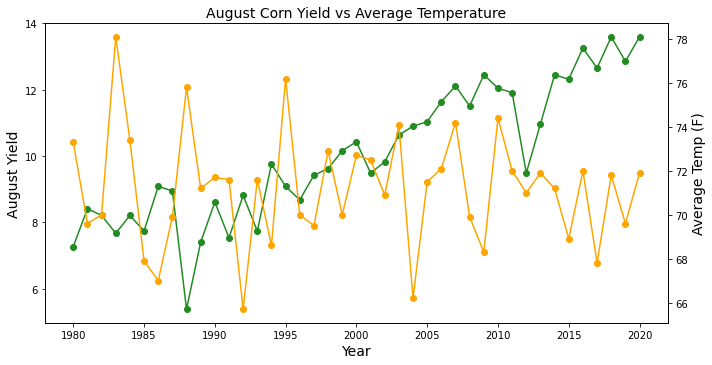

In [16]:

x_axis = Iowa_weather_yield['Year']
y_axis=  Iowa_weather_yield['August Corn yield']
y2_axis= Iowa_weather_yield['Aug mean Temp']




fig,ax=plt.subplots(figsize=(10,5))
ax.plot(x_axis, y_axis, color="forestgreen", marker="o")

ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("August Yield",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x_axis, y2_axis,color="orange",marker="o")
ax2.set_ylabel("Average Temp (F)",fontsize=14)
plt.tight_layout()

plt.title("August Corn Yield vs Average Temperature", fontsize=14)

plt.show()

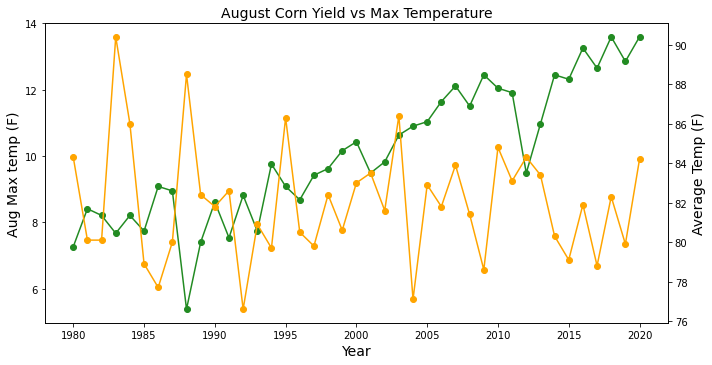

In [17]:
x_axis = Iowa_weather_yield['Year']
y_axis=  Iowa_weather_yield['August Corn yield']
y2_axis= Iowa_weather_yield['Aug MaxTemp']




fig,ax=plt.subplots(figsize=(10,5))
ax.plot(x_axis, y_axis, color="forestgreen", marker="o")

ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Aug Max temp (F)",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x_axis, y2_axis,color="orange",marker="o")
ax2.set_ylabel("Average Temp (F)",fontsize=14)
plt.tight_layout()
plt.title("August Corn Yield vs Max Temperature", fontsize=14)


plt.show()

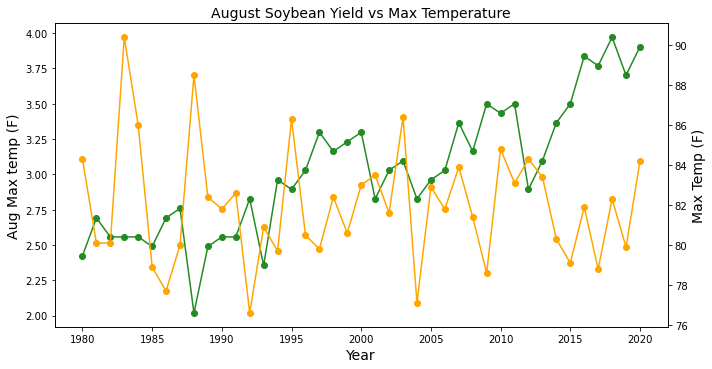

In [18]:
x_axis = Iowa_weather_yield['Year']
y_axis=  Iowa_weather_yield['August soybean yield ']

y2_axis= Iowa_weather_yield['Aug MaxTemp']



fig, ax=plt.subplots(figsize=(10,5))
ax.plot(x_axis, y_axis, color="forestgreen", marker="o")

ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Aug Max temp (F)",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x_axis, y2_axis,color="orange",marker="o")
ax2.set_ylabel("Max Temp (F)",fontsize=14)
plt.tight_layout()
plt.title("August Soybean Yield vs Max Temperature", fontsize=14)



plt.show()

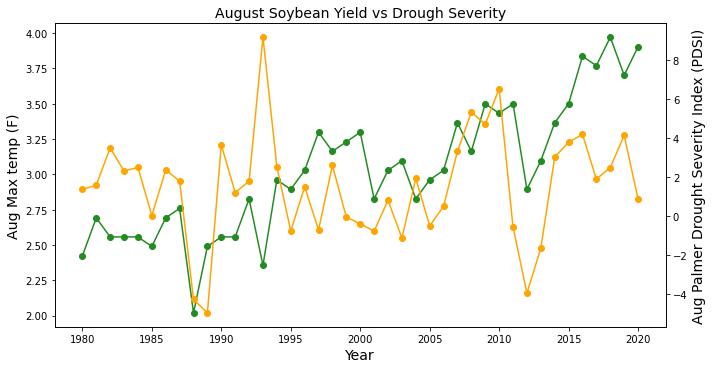

In [19]:
x_axis = Iowa_weather_yield['Year']
y_axis=  Iowa_weather_yield['August soybean yield ']

y2_axis= Iowa_weather_yield['Aug Drought Severity']



fig,ax=plt.subplots(figsize=(10,5))
ax.plot(x_axis, y_axis, color="forestgreen", marker="o")

ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Aug Max temp (F)",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x_axis, y2_axis,color="orange",marker="o")
ax2.set_ylabel("Aug Palmer Drought Severity Index (PDSI)",fontsize=14)
plt.tight_layout()
plt.title("August Soybean Yield vs Drough Severity", fontsize=14)

plt.show()

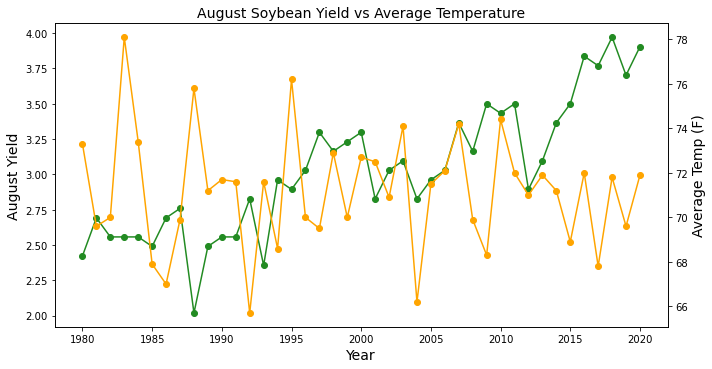

In [20]:
x_axis = Iowa_weather_yield['Year']
y_axis=  Iowa_weather_yield['August soybean yield ']
y2_axis= Iowa_weather_yield['Aug mean Temp']




fig,ax=plt.subplots(figsize=(10,5))
ax.plot(x_axis, y_axis, color="forestgreen", marker="o")

ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("August Yield",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x_axis, y2_axis,color="orange",marker="o")
ax2.set_ylabel("Average Temp (F)",fontsize=14)
plt.tight_layout()

plt.title("August Soybean Yield vs Average Temperature", fontsize=14)

plt.show()

In [21]:
Iowa_weather_yield.head()

,Year,Jun mean Temp,Jul mean Temp,Aug mean Temp,Jun Max Temp,Jul MaxTemp,Aug MaxTemp,Jun Drought Severity,Jul Drought Severity,Aug Drought Severity,August Corn yield,August soybean yield
0,1980,69.6,76.7,73.3,81.5,88.8,84.3,-1.15,-1.63,1.36,7.2684,2.4228
1,1981,70.2,73.3,69.6,82.0,83.0,80.1,0.30,0.88,1.58,8.4125,2.6920
2,1982,64.5,74.1,70.0,75.7,84.8,80.1,2.44,3.29,3.49,8.2106,2.5574
3,1983,69.6,77.2,78.1,80.5,88.8,90.4,4.60,3.61,2.30,7.6722,2.5574
4,1984,70.5,72.2,73.4,81.3,83.9,86.0,4.14,4.00,2.49,8.2106,2.5574


In [22]:
iowa_season_Temp = Iowa_weather_yield[['Jun mean Temp', 'Jul mean Temp', 'Aug mean Temp']]
mean_season_temp= iowa_season_Temp.mean(axis=1)
Iowa_weather_yield.insert(1, "Seasonal_temp", mean_season_temp) 

In [23]:
Iowa_weather_yield.head()

,Year,Seasonal_temp,Jun mean Temp,Jul mean Temp,Aug mean Temp,Jun Max Temp,Jul MaxTemp,Aug MaxTemp,Jun Drought Severity,Jul Drought Severity,Aug Drought Severity,August Corn yield,August soybean yield
0,1980,73.200000,69.6,76.7,73.3,81.5,88.8,84.3,-1.15,-1.63,1.36,7.2684,2.4228
1,1981,71.033333,70.2,73.3,69.6,82.0,83.0,80.1,0.30,0.88,1.58,8.4125,2.6920
2,1982,69.533333,64.5,74.1,70.0,75.7,84.8,80.1,2.44,3.29,3.49,8.2106,2.5574
3,1983,74.966667,69.6,77.2,78.1,80.5,88.8,90.4,4.60,3.61,2.30,7.6722,2.5574
4,1984,72.033333,70.5,72.2,73.4,81.3,83.9,86.0,4.14,4.00,2.49,8.2106,2.5574


In [24]:
iowa_season_Temp = Iowa_weather_yield[['Jun Max Temp', 'Jul MaxTemp', 'Aug MaxTemp']]
max_season_temp= iowa_season_Temp.mean(axis=1)
Iowa_weather_yield.insert(2, "Seasonal_Max_Temp", max_season_temp) 

In [25]:
Iowa_weather_yield.head()


,Year,Seasonal_temp,Seasonal_Max_Temp,Jun mean Temp,Jul mean Temp,Aug mean Temp,Jun Max Temp,Jul MaxTemp,Aug MaxTemp,Jun Drought Severity,Jul Drought Severity,Aug Drought Severity,August Corn yield,August soybean yield
0,1980,73.200000,84.866667,69.6,76.7,73.3,81.5,88.8,84.3,-1.15,-1.63,1.36,7.2684,2.4228
1,1981,71.033333,81.700000,70.2,73.3,69.6,82.0,83.0,80.1,0.30,0.88,1.58,8.4125,2.6920
2,1982,69.533333,80.200000,64.5,74.1,70.0,75.7,84.8,80.1,2.44,3.29,3.49,8.2106,2.5574
3,1983,74.966667,86.566667,69.6,77.2,78.1,80.5,88.8,90.4,4.60,3.61,2.30,7.6722,2.5574
4,1984,72.033333,83.733333,70.5,72.2,73.4,81.3,83.9,86.0,4.14,4.00,2.49,8.2106,2.5574


In [26]:
iowa_season_Temp = Iowa_weather_yield[['Jun Drought Severity', 'Jul Drought Severity', 'Aug Drought Severity']]
drought_season_temp= iowa_season_Temp.mean(axis=1)
Iowa_weather_yield.insert(3, "Seasonal Drought", drought_season_temp)

In [28]:
Iowa_weather_yield.head()

,Year,Seasonal_temp,Seasonal_Max_Temp,Seasonal Drought,Jun mean Temp,Jul mean Temp,Aug mean Temp,Jun Max Temp,Jul MaxTemp,Aug MaxTemp,Jun Drought Severity,Jul Drought Severity,Aug Drought Severity,August Corn yield,August soybean yield
0,1980,73.200000,84.866667,-0.473333,69.6,76.7,73.3,81.5,88.8,84.3,-1.15,-1.63,1.36,7.2684,2.4228
1,1981,71.033333,81.700000,0.920000,70.2,73.3,69.6,82.0,83.0,80.1,0.30,0.88,1.58,8.4125,2.6920
2,1982,69.533333,80.200000,3.073333,64.5,74.1,70.0,75.7,84.8,80.1,2.44,3.29,3.49,8.2106,2.5574
3,1983,74.966667,86.566667,3.503333,69.6,77.2,78.1,80.5,88.8,90.4,4.60,3.61,2.30,7.6722,2.5574
4,1984,72.033333,83.733333,3.543333,70.5,72.2,73.4,81.3,83.9,86.0,4.14,4.00,2.49,8.2106,2.5574


In [ ]:
x_axis = Iowa_weather_yield['Year']
y_axis=  Iowa_weather_yield['August Corn yield']
y2_axis= Iowa_weather_yield['Seasonal_temp']




fig,ax=plt.subplots(figsize=(10,5))
ax.plot(x_axis, y_axis, color="forestgreen", marker="o")

ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("August Yield",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x_axis, y2_axis,color="orange",marker="o")
ax2.set_ylabel("Average Temp (F)",fontsize=14)
plt.tight_layout()

plt.title("August Soybean Yield vs Average Temperature", fontsize=14)

plt.show()